<center><h1>Dimensión fractal en diferentes conjuntos</h1></center>

El presente notebook tiene por objetivo ilustrar la ejecución de las funciones desarrolladas para el cálculo de la dimensión fractal para subconjunto de $\mathbb{R}^{2}$.

In [1]:
import sys
sys.path.insert(0, "Scripts")

from libraries import *
from fractal_dimension import *

## Comparación entre conteo de cajas y dimensión topológica

Para verificar que las funciones se comporten correctamente; las probamos primero con dos conjuntos arquetípicos: una línea recta y un cuadrado. 

Consideramos válidas las funciones para el cálculo de la dimensión a partir del algoritmo de Minkowski-Bouling si es que éstas arrojaran las dimensiones iguales a 1.0 y 2.0 para los conjuntos antes mencionados, respectimante.

In [2]:
length = 1000000

## Recta

Generación de una recta con 1,000,000 puntos.

In [3]:
line_x = np.linspace(0,1,length)
line_y = [0.5 for x in line_x]

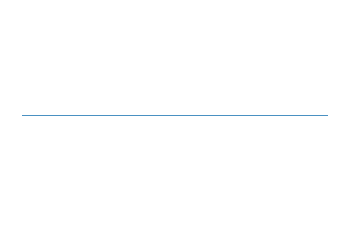

In [4]:
plt.scatter(line_x,line_y,s=0.00005)
plt.axis('equal')
plt.axis('off')
plt.savefig("ilustraciones/plot/Otros/{}".format("recta"),dpi=150)

coefficient (fractal dimension) = 1.0


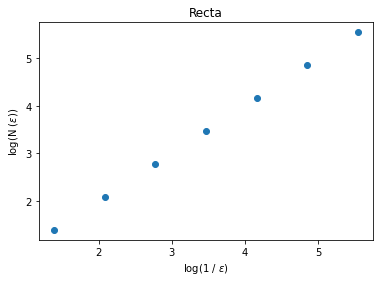

<Figure size 432x288 with 0 Axes>

In [5]:
Line_dimension = Frac_dimension_computation_name_path(line_x,line_y,"Recta","ilustraciones/dim/Otros/Recta")

## Cuadrado

Generación de puntos aleatorios dentro de un cuadrado

In [6]:
# La generación de los puntos aleatorios
rec_coordinates = np.random.rand(length,2)

# Seleccionamos las x,y como listas
rec_x = rec_coordinates[:,0]
rec_y = rec_coordinates[:,1]

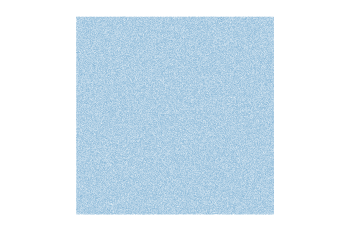

In [7]:
# Graficamos para visualizar el conjunto
plt.scatter(rec_x,rec_y,s=0.00005)
plt.axis('equal')
plt.axis('off')
plt.savefig("ilustraciones/plot/Otros/{}".format("cuadrado"),dpi=150)

coefficient (fractal dimension) = 2.0


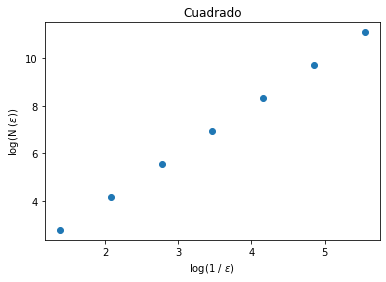

<Figure size 432x288 with 0 Axes>

In [8]:
Square_dimension = Frac_dimension_computation_name_path(rec_x,rec_y,"Cuadrado","ilustraciones/dim/Otros/Cuadrado")

# Juego del caos

Probamos ahora el correcto funcionamiento de las librerías desarrolladas específicamente para medir la dimensión fractal de conjuntos generados a partir del juego del caos en dos diferentes escenarios: El triángulo de Sierpinski

In [9]:
sier_x,sier_y = SFI.Sierpinski_coordinates(Iteraciones=length)

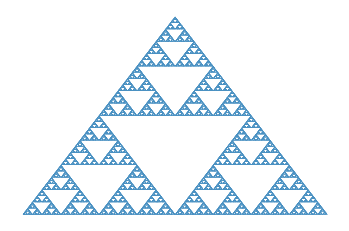

In [10]:
plt.scatter(sier_x,sier_y,s=0.00005)
#plt.axis('equal')
plt.axis('off')
plt.savefig("ilustraciones/plot/Otros/{}".format("sierpinski"),dpi=150)

coefficient (fractal dimension) = 1.5849625007211563


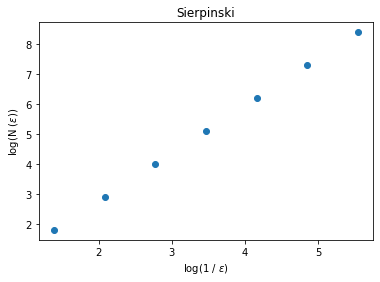

<Figure size 432x288 with 0 Axes>

In [11]:
Sierpinski_dimension = Frac_dimension_computation_name_path(sier_x,sier_y,
                                                            "Sierpinski","ilustraciones/dim/Otros/Sierpinski")

In [12]:
line_r_x = sorted(sier_x)
line_r_y = [0.5 + 1*(np.random.rand()) for x in line_r_x]

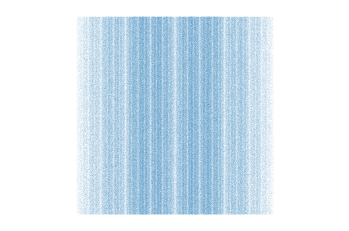

In [13]:
plt.scatter(line_r_x,line_r_y,s=0.00005)
plt.axis('equal')
plt.axis('off')
plt.savefig("ilustraciones/plot/Otros/{}".format("barcode"),dpi=150)

coefficient (fractal dimension) = 1.9990631534946355


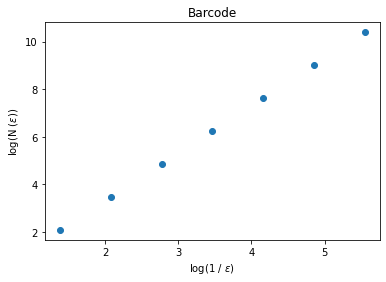

<Figure size 432x288 with 0 Axes>

In [14]:
Barcode_dimension = Frac_dimension_computation_name_path(line_r_x,line_r_y,
                                                         "Barcode",
                                                         "ilustraciones/dim/Otros/Código de barras")

## Genoma humano

Se emula el juego del caos con el genoma humano a basándonos en las ideas de <u>artículo</u>

In [15]:
Dic_2 = {'A':(0,0),'C':(1,0),'G':(1,1),'T':(0,1)}

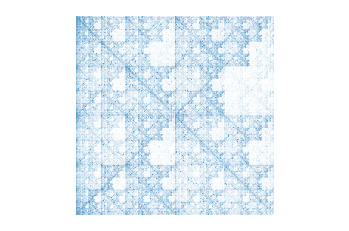

coefficient (fractal dimension) = 1.9904860729248137


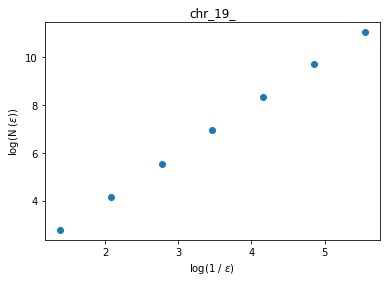

<Figure size 432x288 with 0 Axes>

In [16]:
Chr = "chr_19_.txt"
Str_Chr = load_txt_file("data/",Chr)

# trimming the string to a length of maximum 1,000,000 nucleotides
CG_Chr = chaos_game_chromosome(Str_Chr[0:min(len(Str_Chr),length)],Dic_2)

# grabbing the coordinates
CG_x = [i[0] for i in CG_Chr]
CG_y = [i[1] for i in CG_Chr]

# Plotting 
plt.scatter(CG_x,CG_y,s=0.0000125)
plt.axis('equal')
plt.axis('off')
plt.savefig("ilustraciones/plot/ch19/{}.png".format(Chr.split(".")[0]),dpi=200)
plt.show()
plt.clf()

Chr_19_Fd = Frac_dimension_computation_name_path(CG_x,CG_y,
                                                 Chr.split(".")[0],
                                                 "ilustraciones/dim/ch19/{}".format(Chr.split(".")[0]))

## Random

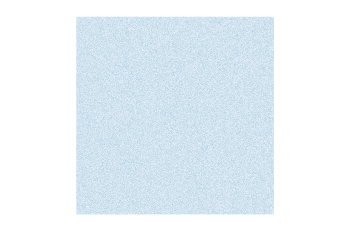

coefficient (fractal dimension) = 2.0


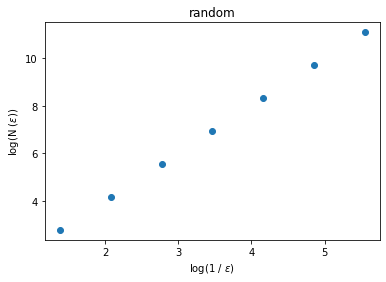

<Figure size 432x288 with 0 Axes>

In [17]:
Str_Chr = random_nuc(length)

# trimming the string to a length of maximum 1,000,000 nucleotides
CG_Chr = chaos_game_chromosome(Str_Chr[0:min(len(Str_Chr),length)],Dic_2)

# grabbing the coordinates
CG_x = [i[0] for i in CG_Chr]
CG_y = [i[1] for i in CG_Chr]

plt.scatter(CG_x,CG_y,s=0.0000125)
plt.axis('equal')
plt.axis('off')
plt.savefig("ilustraciones/plot/random/{}.png".format("random"),dpi=200)
plt.show()
plt.clf()

Chr_19_Fd = Frac_dimension_computation_name_path(CG_x,CG_y,
                                                 "random",
                                                 "ilustraciones/dim/random/{}".format("random"))